In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpl
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
data = pd.read_csv("Stocks2.csv")
# When you can't plot the whole data use this
df = data.iloc[-100:, :]

##### **Show change in close price with respect to date**

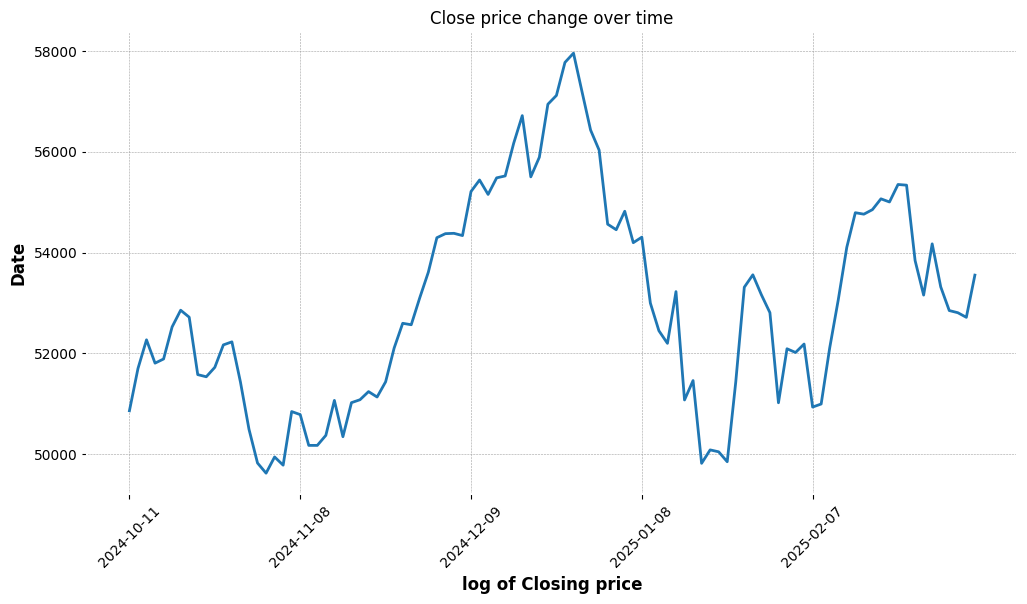

In [ ]:
plt.figure(figsize=(12, 6))
plt.title("Close price change over time")
plt.plot(df['date'], df['adj_close'])
plt.xticks(df['date'][::20], rotation=45)  # to clearly view xlabels
plt.xlabel("log of Closing price")
plt.ylabel("Date")
# plt.yscale("log")
plt.show()

##### **Show the difference between close and adjusted close price**

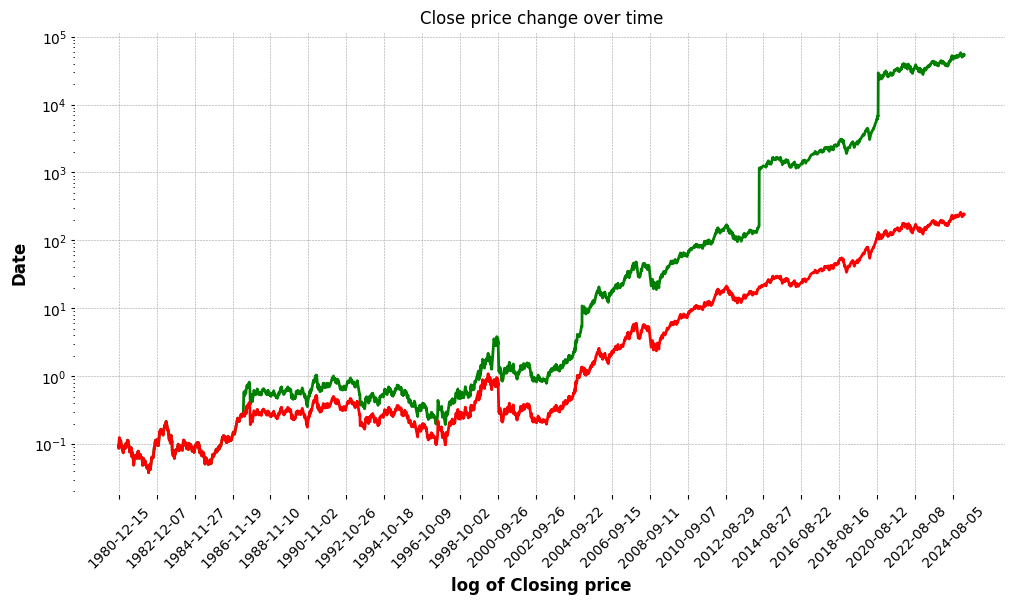

In [ ]:
plt.figure(figsize=(12, 6))
plt.title("Close price change over time")
plt.plot(data['date'], data['adj_close'], color = 'green')
plt.plot(data['date'], data['close'], color = 'red')
plt.xticks(data.index[::500], rotation=45)  # to clearly view xlabels
plt.xlabel("log of Closing price")
plt.ylabel("Date")
plt.yscale("log") # used to scale the values
plt.show()

##### **Plot the OHLS graph**

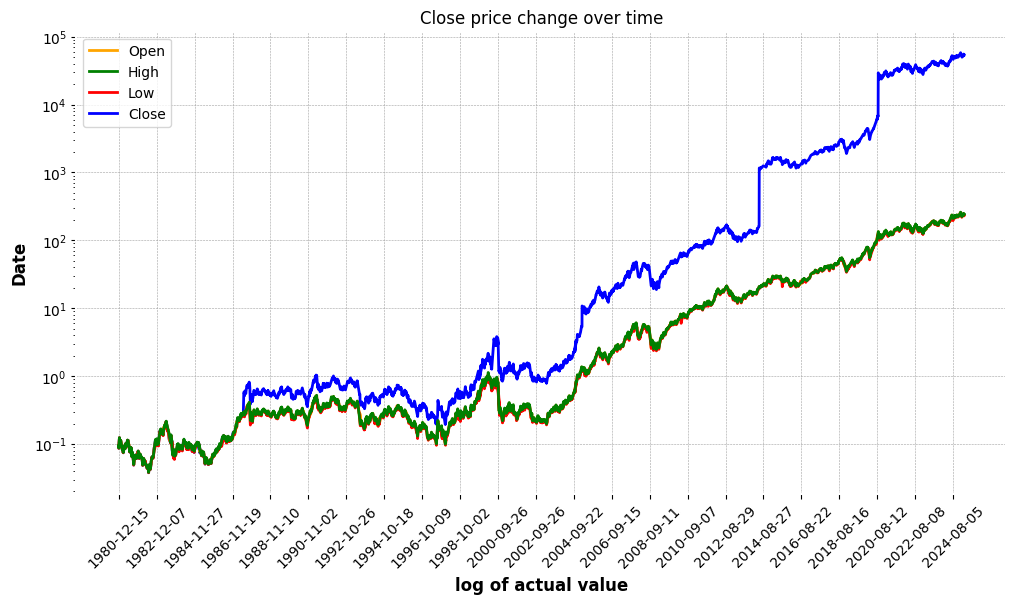

In [ ]:
plt.figure(figsize=(12, 6))
plt.title("Close price change over time")
plt.plot(data['date'], data['adj_close'], color = 'blue')
plt.plot(data['date'], data['open'], color = 'orange')
plt.plot(data['date'], data['low'], color = 'red')
plt.plot(data['date'], data['high'], color = 'green')
plt.xticks(data.index[::500], rotation=45)  # to clearly view xlabels
plt.xlabel("log of actual value")
plt.ylabel("Date")
plt.yscale("log") # used to scale the values
ohlc_legend = [
    plt.Line2D([0], [0], color='orange', label='Open'),
    plt.Line2D([0], [0], color='green', label='High'),
    plt.Line2D([0], [0], color='red', label='Low'),
    plt.Line2D([0], [0], color='blue', label='Close')
]
plt.legend(handles = ohlc_legend)
plt.show()

##### **Use candlestick pattern to see the trend in data**

In [35]:
mp = df.set_index('date')
mp['Close'] = mp['adj_close']
mp.index = mp.index.astype("datetime64[ns]")

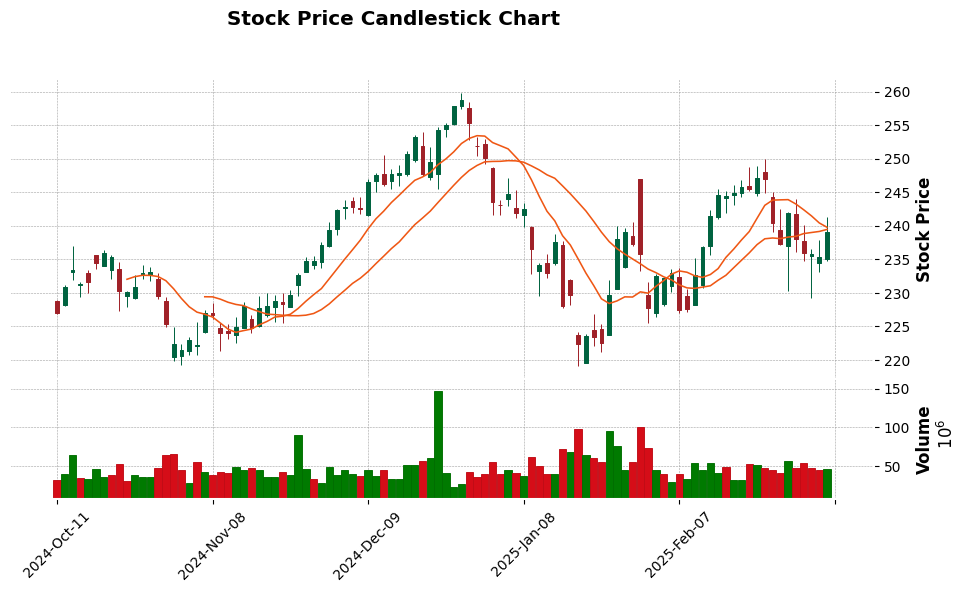

In [36]:
mpl.plot(mp,
         type="candle", 
         style="charles",  # Styles: classic, charles, yahoo, etc.
         title="Stock Price Candlestick Chart",
         ylabel="Stock Price",
         ylabel_lower="Volume",
         volume=True, 
         figsize=(12, 6), 
         mav=(10, 20),  # Moving averages (10-day & 20-day)
         show_nontrading=False)

##### **Plot moving averages as trend**

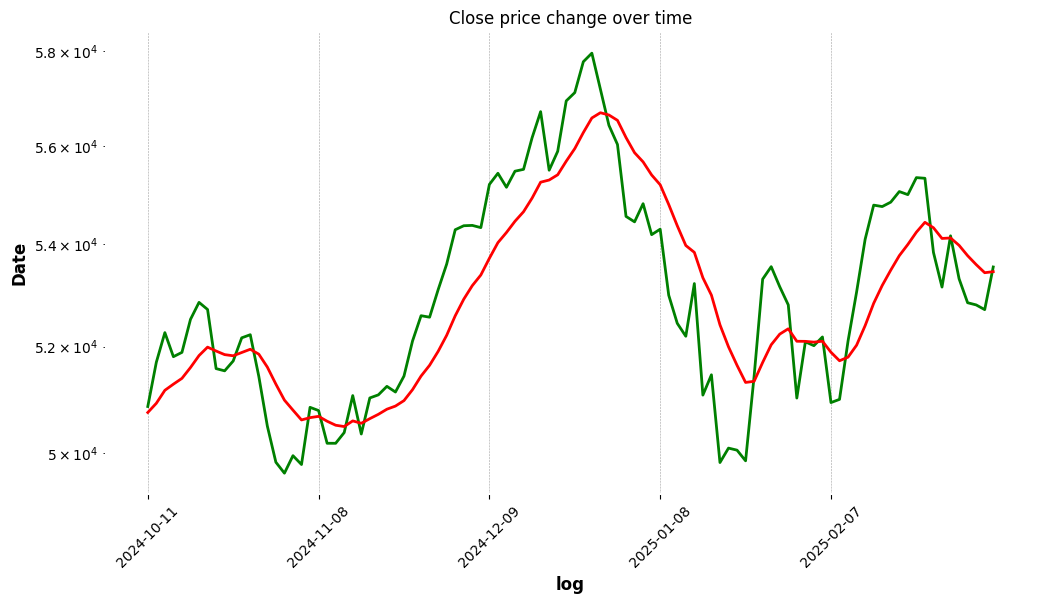

In [37]:
plt.figure(figsize=(12, 6))
plt.title("Close price change over time")
plt.plot(df['date'], df['adj_close'], color = 'green')
plt.plot(df['date'], df['rolling_ma'], color = 'red')
plt.xticks(df['date'][::20], rotation=45) 
plt.xlabel("log")
plt.ylabel("Date")
plt.yscale("log")
plt.show()

##### **Bollinger Band** to view if a price has volatility and potential reversals

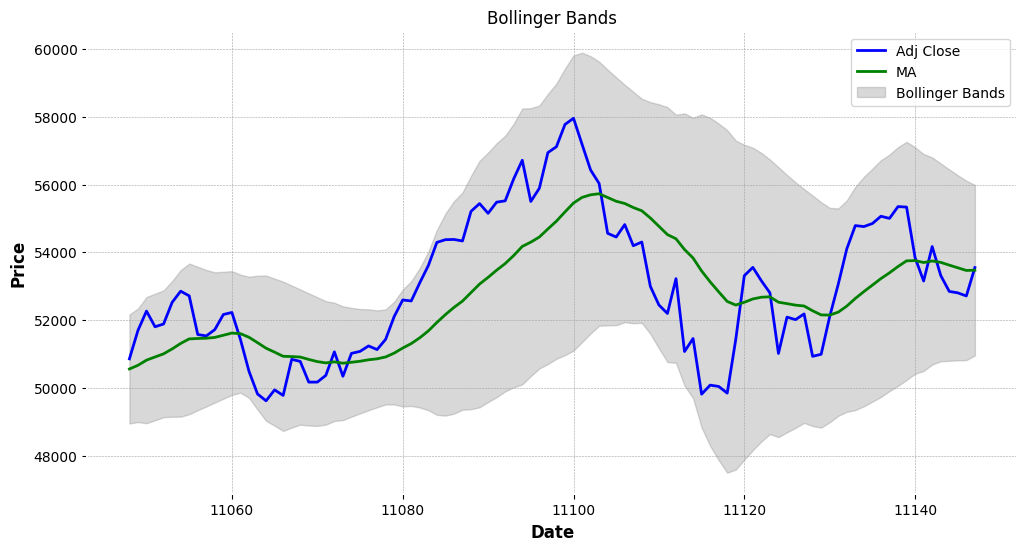

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["adj_close"], label="Adj Close", color="blue")
plt.plot(df.index, df["SMA_20"], label="MA", color="green")
plt.fill_between(df.index, df["upper_band"], df["lower_band"], color="gray", alpha=0.3, label="Bollinger Bands")

plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Bollinger Bands")
plt.legend()
plt.show()

##### **RSI** helps to view overbought and oversold prices

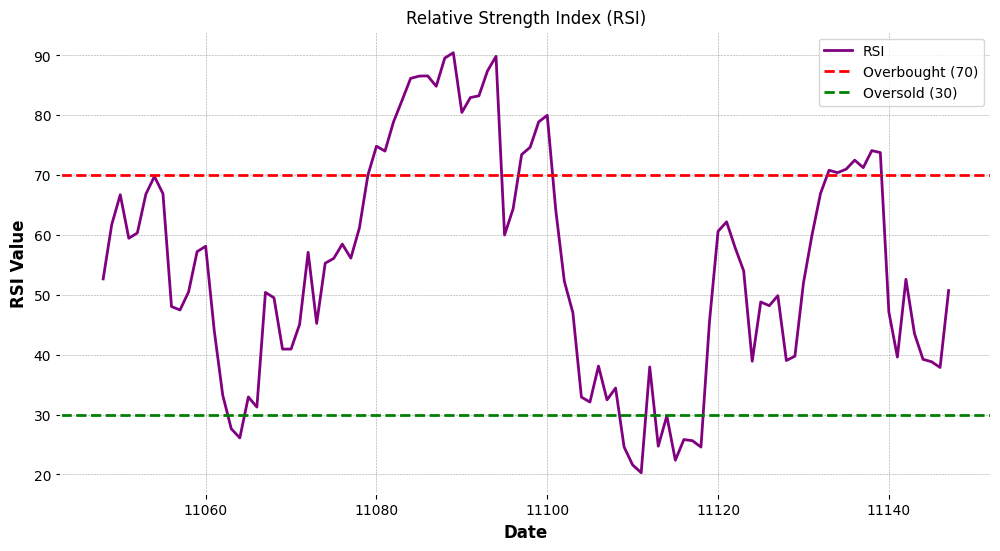

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["RSI"], label="RSI", color="purple")
plt.axhline(70, linestyle="--", color="red", label="Overbought (70)")
plt.axhline(30, linestyle="--", color="green", label="Oversold (30)")

plt.xlabel("Date")
plt.ylabel("RSI Value")
plt.title("Relative Strength Index (RSI)")
plt.legend()
plt.show()

##### **MACD** shows signal for buy and sell

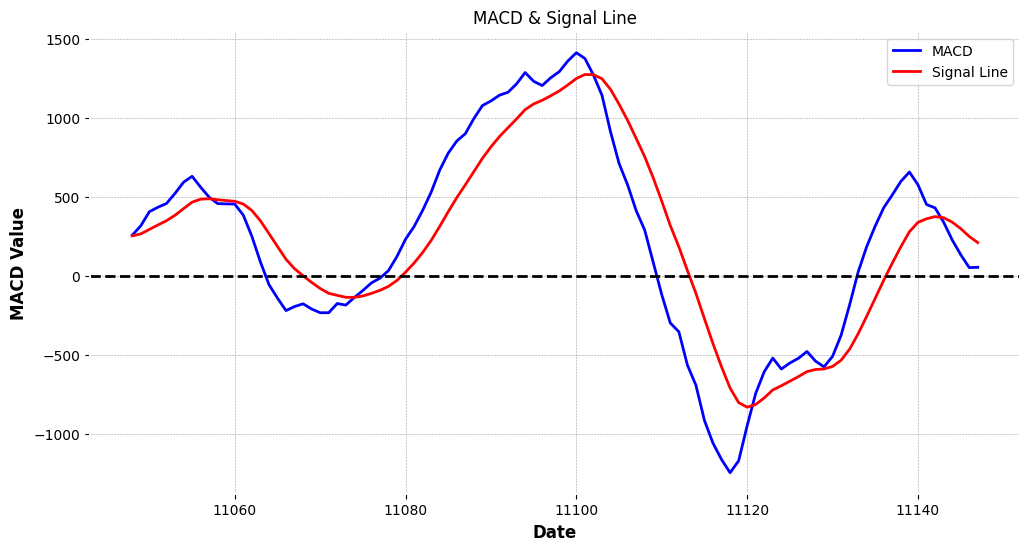

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["MACD"], label="MACD", color="blue")
plt.plot(df.index, df["Signal_Line"], label="Signal Line", color="red")
plt.axhline(0, color="black", linestyle="--")

plt.xlabel("Date")
plt.ylabel("MACD Value")
plt.title("MACD & Signal Line")
plt.legend()
plt.show()


##### **Histogram** helps to view the distribution of the daily returns

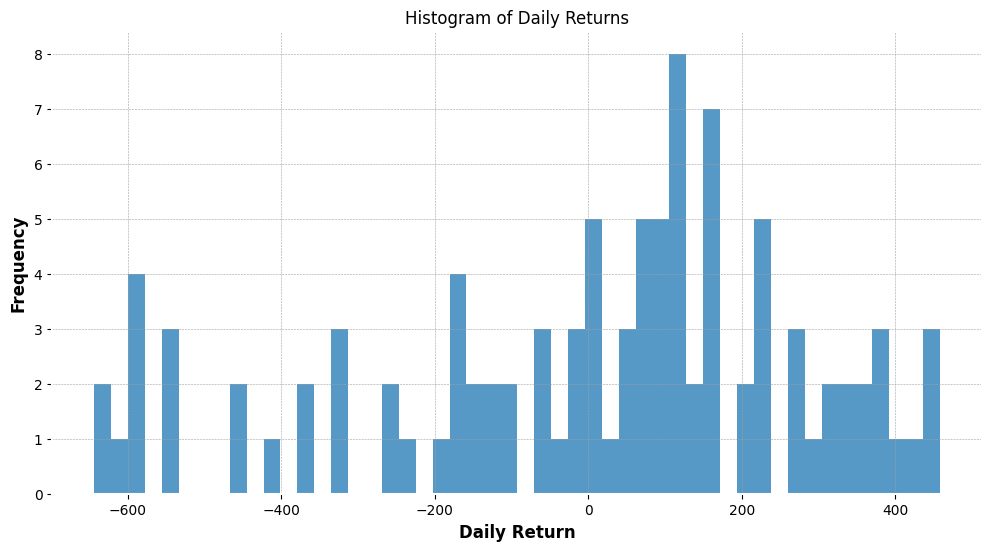

In [50]:
# Plot Histogram
plt.figure(figsize=(12, 6))
plt.hist(df['MACD_Histogram'],bins=50, alpha=0.75)

plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.title("Histogram of Daily Returns")
plt.grid(True)
plt.show()

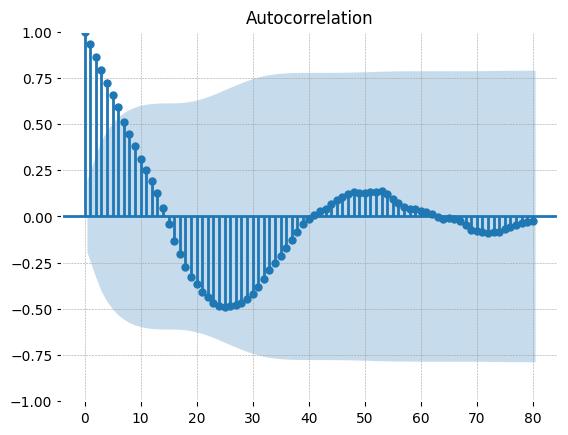

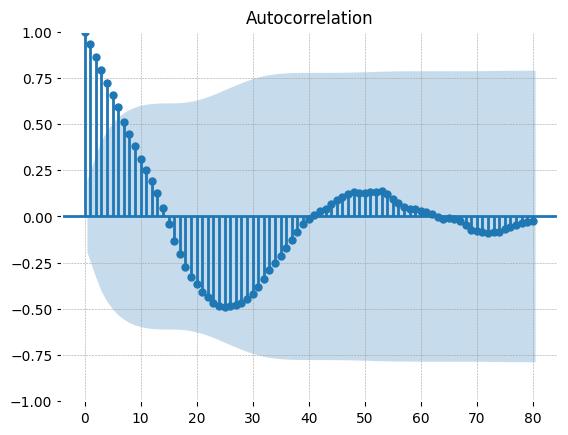

In [26]:
plot_acf(df['adj_close'], lags = 80)

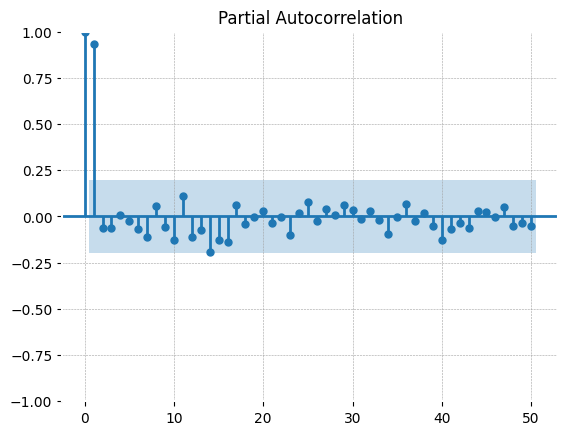

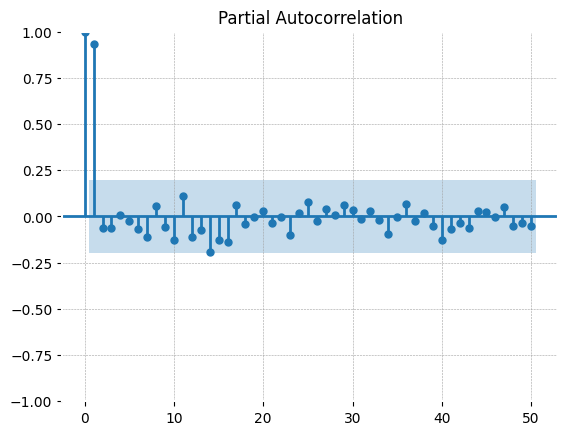

In [28]:
plot_pacf(df['adj_close'], lags = 50)

In [43]:
df.columns

Index(['date', 'close', 'high', 'low', 'open', 'volume', 'split_ratio',
       'adj_factor', 'adj_close', 'rolling_ma', 'change', 'gain', 'loss',
       'avg_gain', 'avg_loss', 'relative_strength', 'RSI', 'EMA_12', 'EMA_26',
       'MACD', 'Signal_Line', 'MACD_Histogram', 'SMA_20', 'STD', 'upper_band',
       'lower_band', 'year', 'month', 'day', 'weekday', 'is_weekend',
       'Fourier_Sin_7', 'Fourier_Cos_7', 'Fourier_Sin_30', 'Fourier_Cos_30'],
      dtype='object')

In [51]:
drop_columns = ['split_ratio', 'adj_factor', 'change', 'gain', 'loss', 'avg_gain', 'avg_loss', 'relative_strength', 'EMA_12', 'EMA_26', 'STD', 'SMA_20']

In [52]:
df2 = df.drop(columns=drop_columns)

In [53]:
df2.head()

,date,close,high,low,open,volume,adj_close,rolling_ma,RSI,MACD,...,lower_band,year,month,day,weekday,is_weekend,Fourier_Sin_7,Fourier_Cos_7,Fourier_Sin_30,Fourier_Cos_30
11048,2024-10-11,227.050293,228.906209,226.840747,228.796450,31759200,50859.265625,50746.745865,52.666278,257.350436,...,48953.076412,2024,10,11,4,0,-0.974928,-0.222521,-1.225885e-15,-1.000000
11049,2024-10-14,230.792053,231.221102,228.097986,228.197757,39882100,51697.419922,50919.595694,61.732288,317.165959,...,48993.233842,2024,10,14,0,0,0.781831,0.623490,-5.877853e-01,-0.809017
11050,2024-10-15,233.336456,236.968462,231.859696,233.096978,64751400,52267.366211,51164.644879,66.731851,405.881346,...,48958.686509,2024,10,15,1,0,0.974928,-0.222521,-7.431448e-01,-0.669131
11051,2024-10-16,231.270996,231.610246,229.335254,231.091399,34082200,51804.703125,51281.019105,59.456145,433.854678,...,49046.681983,2024,10,16,2,0,0.433884,-0.900969,-8.660254e-01,-0.500000
11052,2024-10-17,231.640182,233.336461,230.013772,232.917370,32993800,51887.400879,51391.270337,60.347778,457.423866,...,49136.284319,2024,10,17,3,0,-0.433884,-0.900969,-9.510565e-01,-0.309017
